In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:xlabel='Category', ylabel='count'>

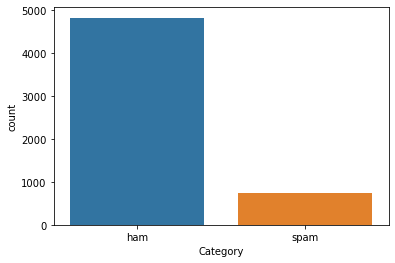

In [5]:
sns.countplot(x="Category", data=df)

In [6]:
df["length"] = df["Message"].str.len()

Text(0.5, 1.0, 'Spam')

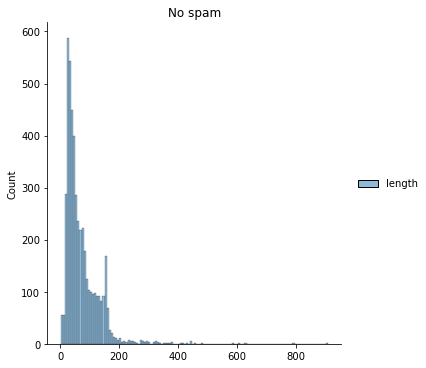

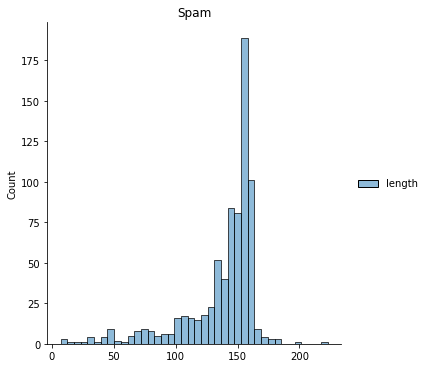

In [7]:
sns.displot(df[df.Category == "ham"])
plt.title("No spam")
sns.displot(df[df.Category == "spam"])
plt.title("Spam")

## Baseline model

In [8]:
label_encoder = LabelEncoder()
vectorizer = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

In [9]:
X = vectorizer.fit_transform(df["Message"])
y = label_encoder.fit_transform(df["Category"])

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

y_predictions = lr.predict(X_valid)

In [13]:
print(accuracy_score(y_predictions, y_valid))

0.95695067264574


In [15]:
confusion_matrix(y_predictions, y_valid)

array([[966,  48],
       [  0, 101]])

In [17]:
precision_score(y_predictions, y_valid)

0.6778523489932886

In [18]:
recall_score(y_predictions, y_valid)

1.0

In [20]:
f1_score(y_predictions, y_valid)

0.808